# Interactive image visualization with napari
[napari](https://napari.org/) is a python-based image viewer. This notebook demonstrates how to remote control it from python.

See also
* [napari viewer tutorial](https://napari.org/tutorials/fundamentals/viewer.html)
* [napari image layer tutorial](https://napari.org/tutorials/fundamentals/image.html)
* [napari labels layer tutorial](https://napari.org/tutorials/fundamentals/labels.html)
* [Multi-dimensional image visualization in Python using napari [NEUBIAS Academy@Home] webinar](https://www.youtube.com/watch?v=VgvDSq5aCDQ)

For opening an image, we still use scikit-image:

In [1]:
import napari
from skimage.io import imread
import napari_segment_blobs_and_things_with_membranes as nsbatm
import napari_skimage_regionprops as nsr

In [2]:
# Create an empty viewer
viewer = napari.Viewer()

First we load an image and show it in the viewer.

In [3]:
image = imread('../../data/nuclei.tif')

viewer.add_image(image)

<Image layer 'image' at 0x1e423868df0>

With this command, we can make a screenshot of napari and save it in our notebook.

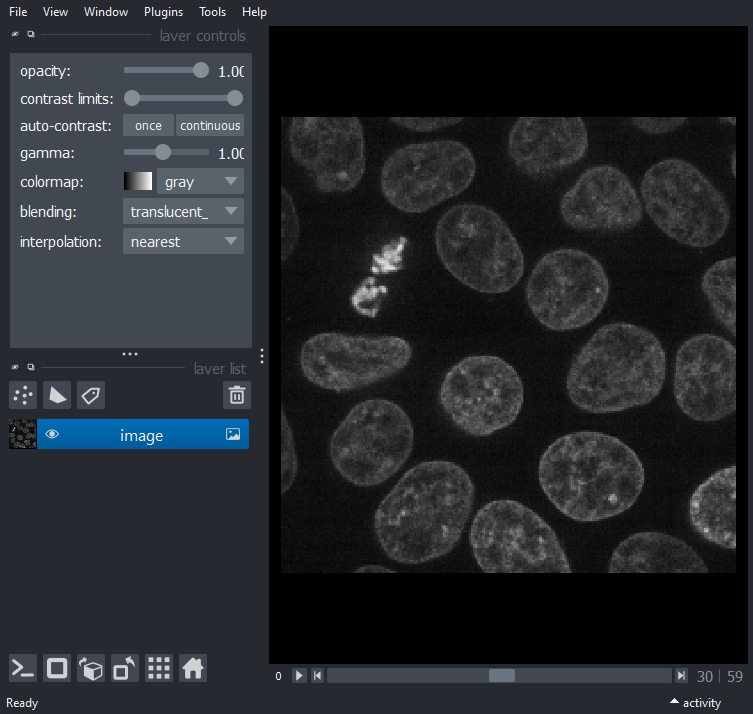

In [4]:
napari.utils.nbscreenshot(viewer)

## Cell segmentation
We can also segment the nuclei and show them on top of the image.

In [5]:
label_image = nsbatm.voronoi_otsu_labeling(image, spot_sigma=9)

# add labels to viewer
label_layer = viewer.add_labels(label_image)

You can visualize labelled objects as overlay (per default)

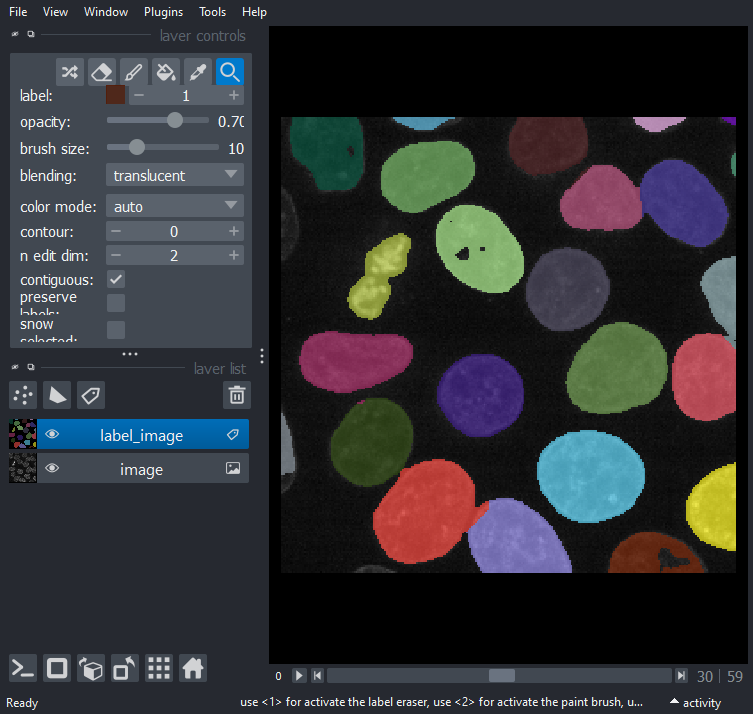

In [6]:
napari.utils.nbscreenshot(viewer)

... or as opaque contours

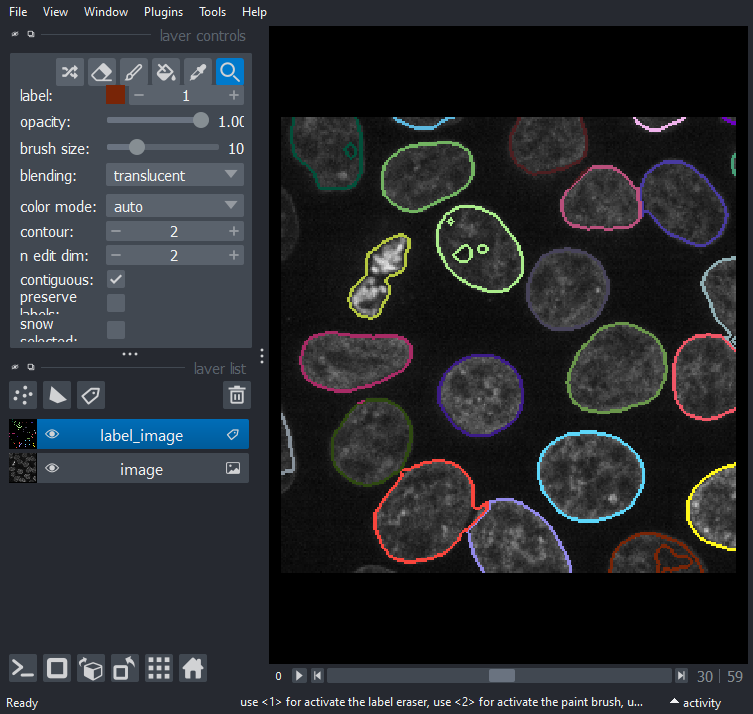

In [7]:
label_layer.contour = 2
label_layer.opacity = 1

napari.utils.nbscreenshot(viewer)

## Quantitative measurements
We can also derive quantitative measurements and attach them to the napari viewer.

Napari status bar display of label properties disabled because https://github.com/napari/napari/issues/5417 and https://github.com/napari/napari/issues/4342


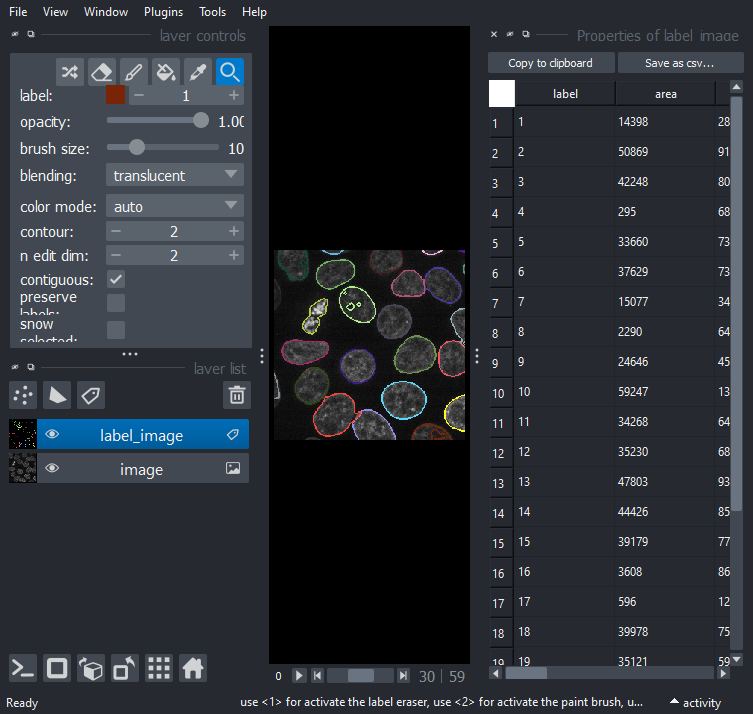

In [8]:
nsr.regionprops_table(image, label_image, napari_viewer=viewer)

napari.utils.nbscreenshot(viewer)